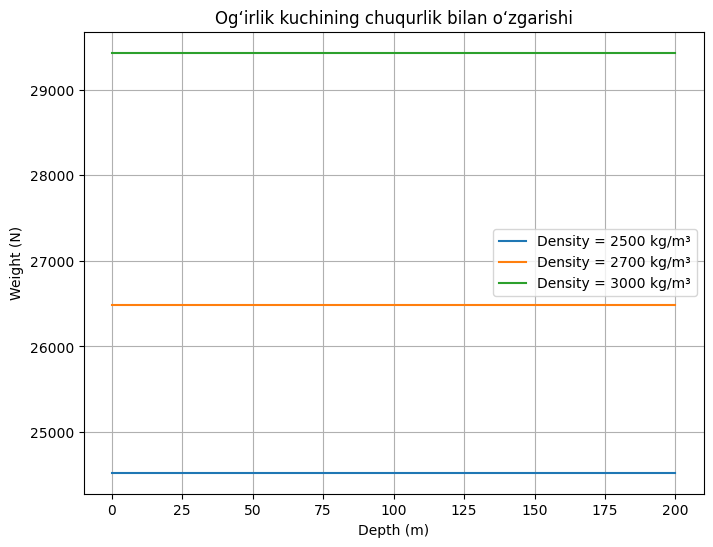

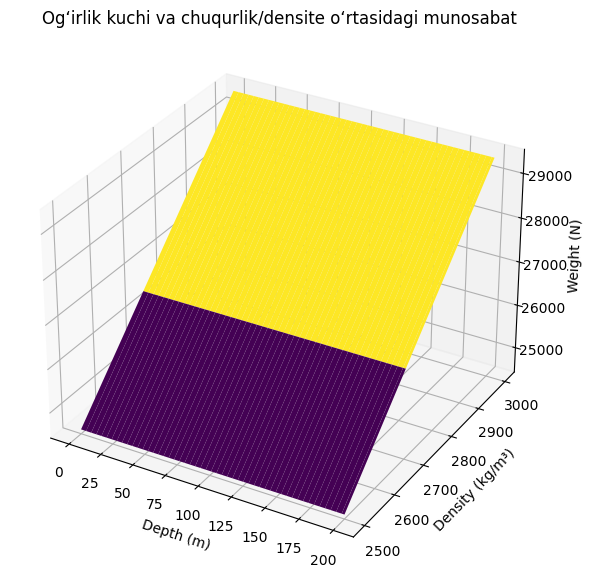

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 1. Ma'lumotlar to‘plash
# Chuqurliklar va og‘irlik kuchi uchun massivlar
depths = np.linspace(0, 200, 100)  # Chuqurliklar 0 dan 200 m gacha
densities = np.array([2500, 2700, 3000])  # Zichliklar (kg/m^3)

# Gravitatsion kuchi hisoblash
g = 9.81  # Gravitatsion doimiylik (m/s^2)
weights = np.zeros((len(densities), len(depths)))

# Har bir zichlik uchun og‘irlik kuchi hisoblash
for i, rho in enumerate(densities):
    mass = rho * 1  # Jismning hajmi 1 m^3 deb olamiz
    weights[i, :] = mass * g  # Og‘irlik kuchini hisoblash

# 2. 2D Graﬁk tayyorlash
plt.figure(figsize=(8, 6))
for i, rho in enumerate(densities):
    plt.plot(depths, weights[i, :], label=f'Density = {rho} kg/m³')

plt.xlabel('Depth (m)')
plt.ylabel('Weight (N)')
plt.title('Og‘irlik kuchining chuqurlik bilan o‘zgarishi')
plt.legend()
plt.grid(True)
plt.show()

# 3. 3D Graﬁk tayyorlash
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Chuqurliklar va zichliklarni 2D to‘plamda birlashtirish
X, Y = np.meshgrid(depths, densities)
Z = np.zeros(X.shape)

# Og‘irlik kuchi hisoblash
for i, rho in enumerate(densities):
    Z[i, :] = rho * 1 * g  # Jismning hajmi 1 m^3 deb olamiz

# 3D sirt graﬁgi
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Depth (m)')
ax.set_ylabel('Density (kg/m³)')
ax.set_zlabel('Weight (N)')
ax.set_title('Og‘irlik kuchi va chuqurlik/densite o‘rtasidagi munosabat')
plt.show()




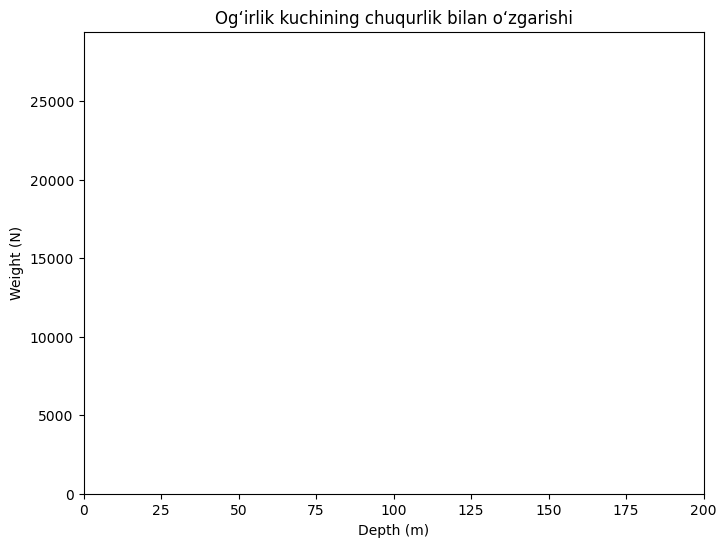

In [3]:
# 4. Animatsiya yaratish
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 200)
ax.set_ylim(0, np.max(weights))

ax.set_xlabel('Depth (m)')
ax.set_ylabel('Weight (N)')
ax.set_title('Og‘irlik kuchining chuqurlik bilan o‘zgarishi')

# Animatsiya uchun funksiya
def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(depths[:frame], weights[0, :frame])  # Faqat birinchi zichlikni ko‘rsatamiz
    return line,

ani = FuncAnimation(fig, update, frames=len(depths), init_func=init, blit=True)
plt.show()